## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./data/homework-practice-03-data.csv')

## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [3]:
df.head()

,f0,f1,f2,f3,f4,f5,f6
0,16.99,1.01,0.976270,-3.697815,0.623295,0.524760,7199.992000
1,10.34,1.66,4.303787,7.715073,0.886961,0.473862,2466.136700
2,21.01,3.50,2.055268,-6.464284,0.618826,1.657394,2969.369100
3,23.68,3.31,0.897664,1.335254,0.133461,1.234554,1040.665300
4,24.59,3.61,-1.526904,-0.196414,0.980580,3.086397,37.469975


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, train_size=0.8, random_state=777)

/home/fedor/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
y = df_scaled['f1']
df_scaled.drop('f1', 1, inplace=True)
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df_scaled

array([[ 0.29157939,  0.54731902,  0.40047788,  0.6232234 ,  0.06123653,
         0.02631221],
       [ 0.1522832 ,  0.71467363,  0.85011312,  0.88744583,  0.05529074,
         0.00899738],
       [ 0.3757855 ,  0.60158628,  0.29148688,  0.61874548,  0.19354611,
         0.01083804],
       ..., 
       [ 0.41055718,  0.1135002 ,  0.59932855,  0.48302714,  0.15182911,
         0.00923858],
       [ 0.30896523,  0.5156997 ,  0.45419933,  0.03869091,  0.00280662,
         0.00956172],
       [ 0.32907415,  0.12812196,  0.26705095,  0.63966848,  0.06562437,
         0.0011871 ]])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, train_size=0.8, random_state=777)

/home/fedor/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

reg = LinearRegression()
lasso = Lasso(alpha = 0.01)

reg.fit(x_train, y_train)
lasso.fit(x_train, y_train)

r_p_test = reg.predict(x_test)
l_p_test = lasso.predict(x_test)

print('R2 Score\n')
print('For Linear Regression %.3f\n' % r2_score(y_test, r_p_test))
print('For Lasso regularization %.3f\n' % r2_score(y_test, l_p_test))


R2 Score

For Linear Regression 0.510

For Lasso regularization 0.502



#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [8]:
import numpy as np
print(reg.coef_)
print(lasso.coef_)
n = len(reg.coef_)
print(n - np.count_nonzero(reg.coef_))
print(n - np.count_nonzero(lasso.coef_))

[ 4.51582125 -0.09947848 -0.03671784 -0.04038954  1.23371996  0.20229514]
[ 4.25977961 -0.          0.         -0.          0.56542557  0.        ]
0
4


Лассо в силу своей модели зануляет маловлияющие веса f2 f3 f4 f6

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('target')

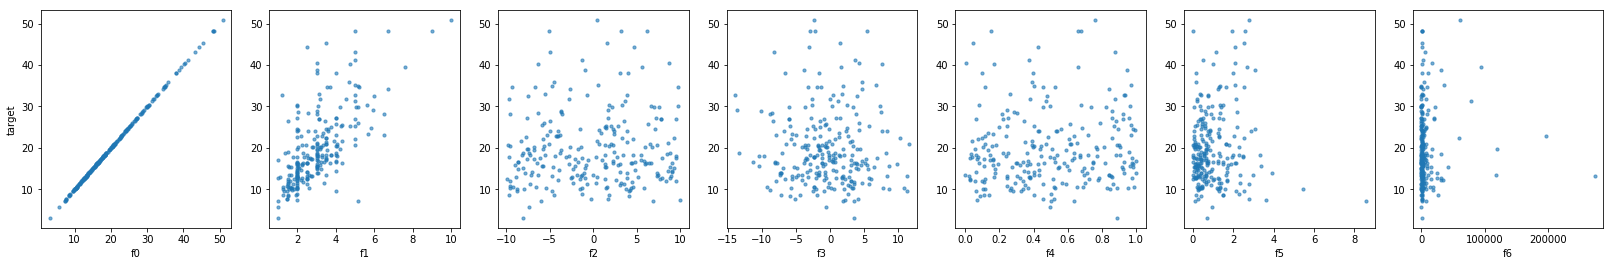

In [10]:
pairplot(df, df.f0)

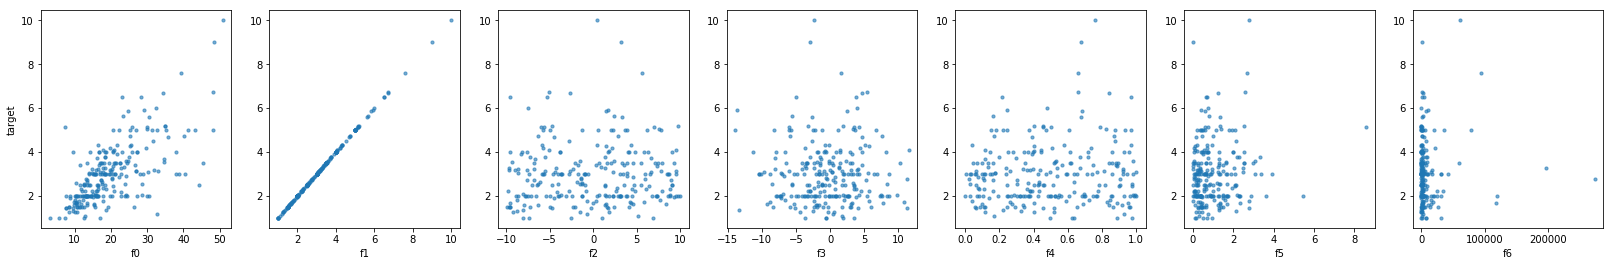

In [11]:
pairplot(df, df.f1)

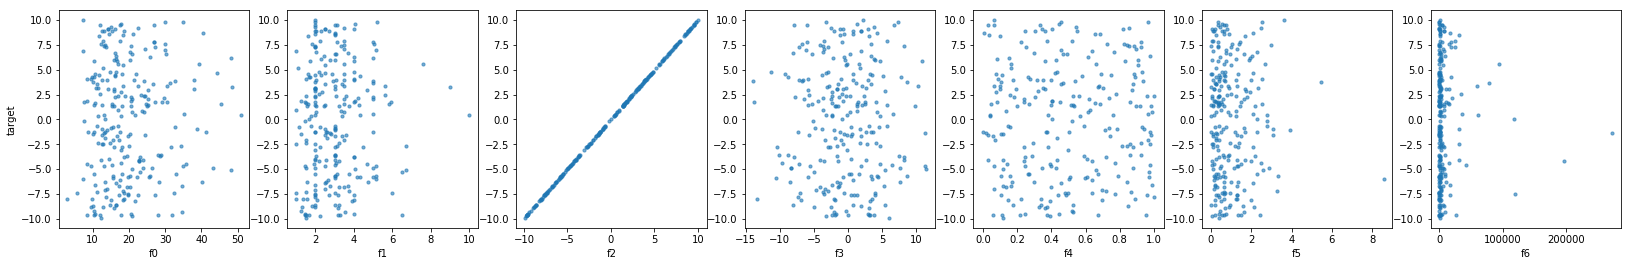

In [12]:
pairplot(df, df.f2)

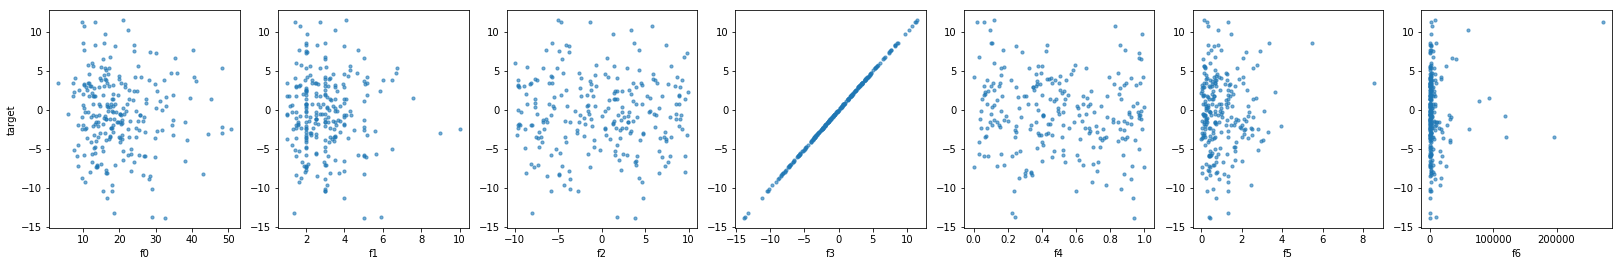

In [13]:
pairplot(df, df.f3)

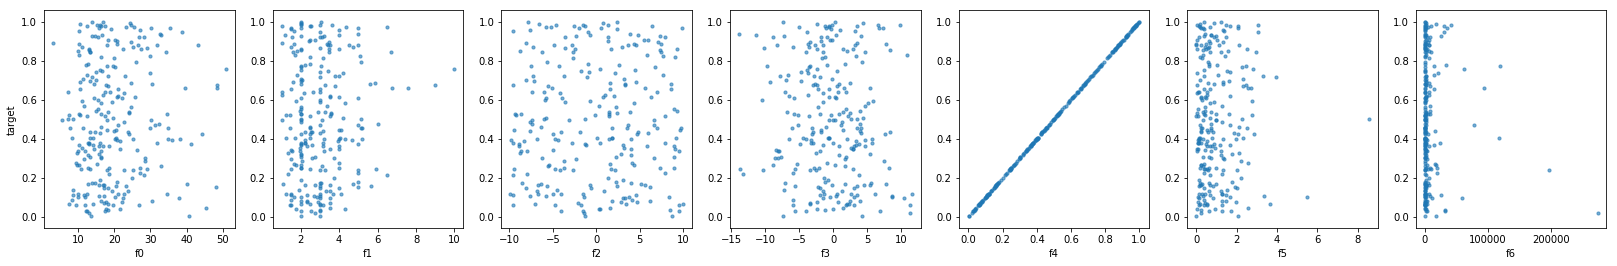

In [14]:
pairplot(df, df.f4)

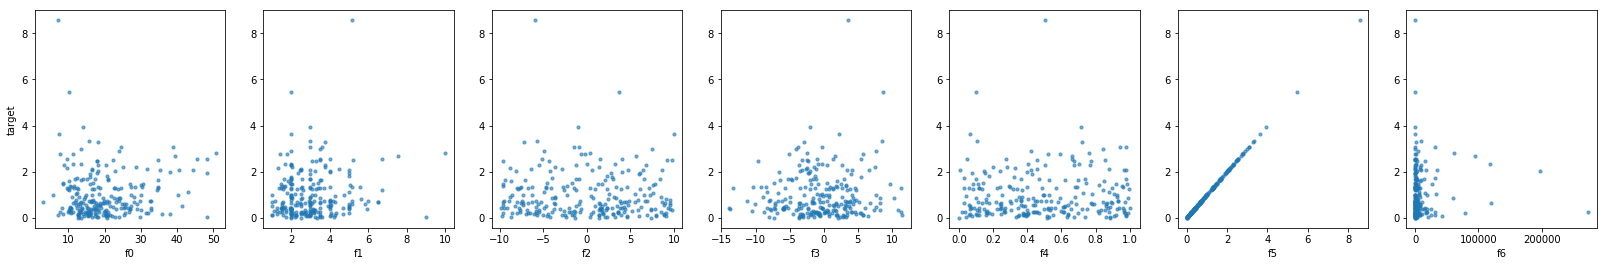

In [15]:
pairplot(df, df.f5)

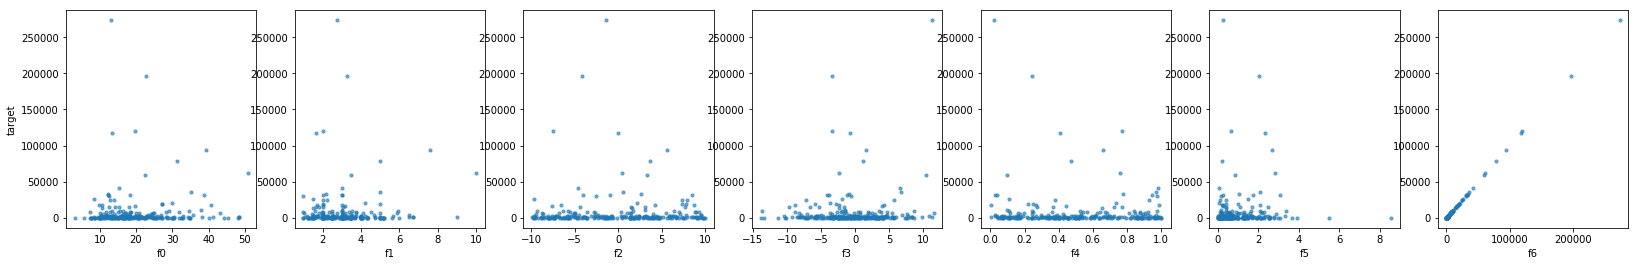

In [16]:
pairplot(df, df.f6)

2, 3, 4 плохо линейно разделимы, 6 параметр хоть и разделим, не сильно влияет на ответ, как это показывает его вес в линейной регрессии и поэтому тоже оказался занулен

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report): https://contest.yandex.ru/contest/9247/run-report/12242593/

In [17]:
from sklearn.base import BaseEstimator
import numpy as np
from numpy import where, sign, newaxis, dot

class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2, is_full_momentum = False):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.momentum = is_full_momentum
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        self.w = np.copy(self.w0)
        if (self.w == None):
            self.w = np.zeros(X.shape[1])
        
        if (self.gd_type == 'full' and self.momentum == False):
            for i in range(self.max_iter):
                grad = self.calc_gradient(X, y)
                self.loss_history.append(self.calc_loss(X, y))
                w_new = self.w - self.eta * grad
                if np.linalg.norm(w_new - self.w) < self.tolerance:
                    return self
                self.w = w_new
        elif (self.gd_type == 'full' and self.momentum == True):
            dw = np.zeros(self.w.shape[0])
            for i in range(self.max_iter):
                grad = self.calc_gradient(X, y)
                self.loss_history.append(self.calc_loss(X, y))
                dw = self.alpha * dw - self.eta * grad
                self.w = self.w + dw
                if np.linalg.norm(dw) < self.tolerance:
                    return self
        elif (self.gd_type == 'stochastic'):
            PARTS = 20
            dw = np.zeros(self.w.shape[0])
            n = len(X)
            if n // PARTS > 0:
                batch_size = n // PARTS
            else:
                batch_size = 1
                PARTS = n
            for i in range(self.max_iter):
                k = i % PARTS
                if k == 0:
                    cols = X.shape[1]
                    X = np.append(X, y.reshape(y.shape[0], 1), axis = 1)
                    X = np.random.permutation(X)
                    y = X[:, cols]
                    X = np.delete(X, cols, 1)
                cur_X = X.take(range(k * batch_size, (k + 1) * batch_size), axis = 0)
                cur_y = y.take(range(k * batch_size, (k + 1) * batch_size), axis = 0)
                grad = self.calc_gradient(cur_X, cur_y)
                self.loss_history.append(self.calc_loss(cur_X, cur_y))
                dw = self.alpha * dw - self.eta * grad
                self.w = self.w + dw
                if np.linalg.norm(dw) < self.tolerance:
                    return self
                
        return self
    
    def predict(self, X):
        """
        if self.w is None:
            raise Exception('Not trained yet')
        """
        return dot(X, self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        dist = (self.predict(X) - y)[:, newaxis]
        return where(abs(dist) <= self.delta, dist * X, self.delta * sign(dist) * X).mean(0)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """
        dist = abs(self.predict(X) - y)
        return np.where(dist <= self.delta, 0.5 * dist * dist, self.delta * dist - 0.5 * self.delta * self.delta).mean()
        pass

In [18]:
reg = HuberReg()
X = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
y = np.array([4, 5, 8])
reg.fit(X, y)
grad = reg.calc_gradient(X, y)
grad

array([ 4.73126356,  5.46252712,  6.19379068,  6.92505424])

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [19]:
np.random.seed(42)
hub = HuberReg(gd_type='full', alpha = 0.3, max_iter = 10000)

hub.fit(np.array(x_train), np.array(y_train))

h_p_test = hub.predict(np.array(x_test))

print('R2 Score\n')
print('For Huber Regression %.3f\n' % r2_score(np.array(y_test), h_p_test))
#print(hub.loss_history)

R2 Score

For Huber Regression 0.554



In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

def r2_scorer(estimator, X_test, y_test):
    return r2_score(y_test, estimator.predict(X_test))

pipe = Pipeline([
    ('reg', HuberReg())
])

params = [{
    'reg': [HuberReg()],
    'reg__alpha': np.logspace(-4, 0, 20),
    'reg__max_iter': np.linspace(1000, 20000, 10).astype(int)
}]

train_x, train_y = np.array(x_train), np.array(y_train)

cv = GridSearchCV(pipe, params, cv=4, scoring=r2_scorer)
cv.fit(train_x, train_y)

GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reg', HuberReg(alpha=0.001, delta=1.0, eta=0.01, gd_type='stochastic',
     is_full_momentum=None, max_iter=1000, tolerance=0.0001, w0=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'reg': [HuberReg(alpha=0.00069519279617756048, delta=1.0, eta=0.01,
     gd_type='stochastic', is_full_momentum=None, max_iter=17888,
     tolerance=0.0001, w0=None)], 'reg__alpha': array([  1.00000e-04,   1.62378e-04,   2.63665e-04,   4.28133e-04,
         6.95193e-04,   1.12884e-03,  ...]), 'reg__max_iter': array([ 1000,  3111,  5222,  7333,  9444, 11555, 13666, 15777, 17888, 20000])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=<function r2_scorer at 0x7f9fedbb4e18>, verbose=0)

In [24]:
cv_grid = pd.DataFrame(cv.cv_results_['params'])
cv_grid['val R2'] = cv.cv_results_['mean_test_score']
cv_grid['reg'] = cv_grid['reg'].apply(lambda x: x.__class__.__name__)
cv_grid = cv_grid.sort_values('val R2', ascending=False)
cv_grid

,reg,reg__alpha,reg__max_iter,val R2
48,HuberReg,0.000695,17888,0.350469
107,HuberReg,0.012743,15777,0.343595
84,HuberReg,0.004833,9444,0.333563
113,HuberReg,0.020691,7333,0.298692
103,HuberReg,0.012743,7333,0.298414
123,HuberReg,0.033598,7333,0.298184
143,HuberReg,0.088587,7333,0.298141
33,HuberReg,0.000428,7333,0.298130
153,HuberReg,0.143845,7333,0.298035
181,HuberReg,0.615848,3111,0.297971


In [25]:
print(cv.best_params_)

{'reg': HuberReg(alpha=0.00069519279617756048, delta=1.0, eta=0.01,
     gd_type='stochastic', is_full_momentum=None, max_iter=17888,
     tolerance=0.0001, w0=None), 'reg__alpha': 0.00069519279617756048, 'reg__max_iter': 17888}


In [26]:
print('Test R2 is %.3f' % r2_scorer(cv, x_test, y_test))

Test R2 is 0.574


Вспоминая предыдущие модели:  
For Linear Regression 0.510  
For Lasso regularization 0.502  
Качество стало немного лучше. Также видно, что лучшие значения инерции alpha порядка 0.01 - 0.001, а числа итераций порядка 5к+, что приблизительно в 25+ раз больше обучающей выборки  

>Согласуется ли оно с вашими ожиданиями?  
Да, слишком малая альфа не помогает успеть алгоритму сойтись, а слишком большая(порядка 1) несет его в ненужную сторону еще очень долго. Слишком малое число итераций не даст успеть алгоритму сойтись до лучшего значения


#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!

/home/fedor/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


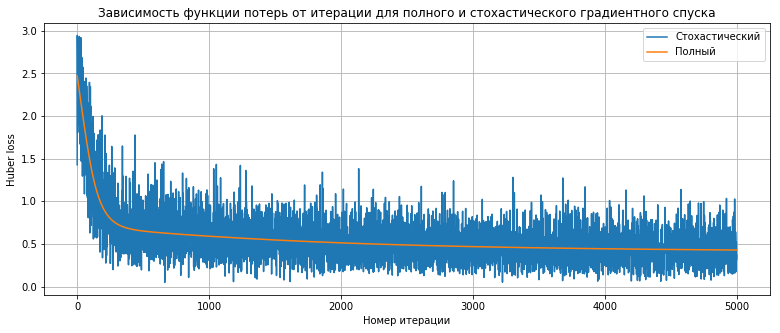

In [27]:
np.random.seed(42)

hubfull = HuberReg(gd_type='full', alpha = 0.2, max_iter = 5000, is_full_momentum = True)
hubstoch = HuberReg(alpha = 0.2, max_iter = 5000, tolerance = 1e-5)

hubfull.fit(np.array(x_train), np.array(y_train))
hubstoch.fit(np.array(x_train), np.array(y_train))

f, ax = plt.subplots(figsize=(13, 5))
ax.plot(np.array(range(len(hubstoch.loss_history))), hubstoch.loss_history, label=u"Стохастический")
ax.plot(np.array(range(len(hubfull.loss_history))), hubfull.loss_history, label=u"Полный")
ax.set_title(u"Зависимость функции потерь от итерации для полного и стохастического градиентного спуска")
ax.set_xlabel(u"Номер итерации")
ax.set_ylabel(u"Huber loss")
ax.grid()
ax.legend()

f.show()     

Полный убывает монотонно,  
тогда как стохастический, ввиду своей модели кидает в разные стороны  
(можно было бы улучшить его сходимость, уменьшая шаг и инерцию в зависимости от номера итерации)